In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,StandardScaler,PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,LogisticRegression,Ridge,Lasso

# 0. Load Data into dataframe

In [3]:
df = pd.read_csv("../../DataSets/scooter_battery_dataset.csv")

# 1. Null values
###  Mean Median Mode

In [4]:
total = df.isna().sum()
print(total/df.shape[0]*100)

RideDistance_km        0.0
AvgSpeed_kmh           0.0
Temperature_C          0.0
RiderWeight_kg         0.0
BatteryDrop_Percent    0.0
dtype: float64


# dupliates

In [5]:
df.shape

(900, 5)

In [6]:
df.drop_duplicates().shape

(900, 5)

# outlier  IQR Q1 Q2 Q3 
- lower = Q1-1.5*IQR
- ipper = Q3+1.5*IQR
# Z score
- (x - mean(x)/sd)  -3 to 3

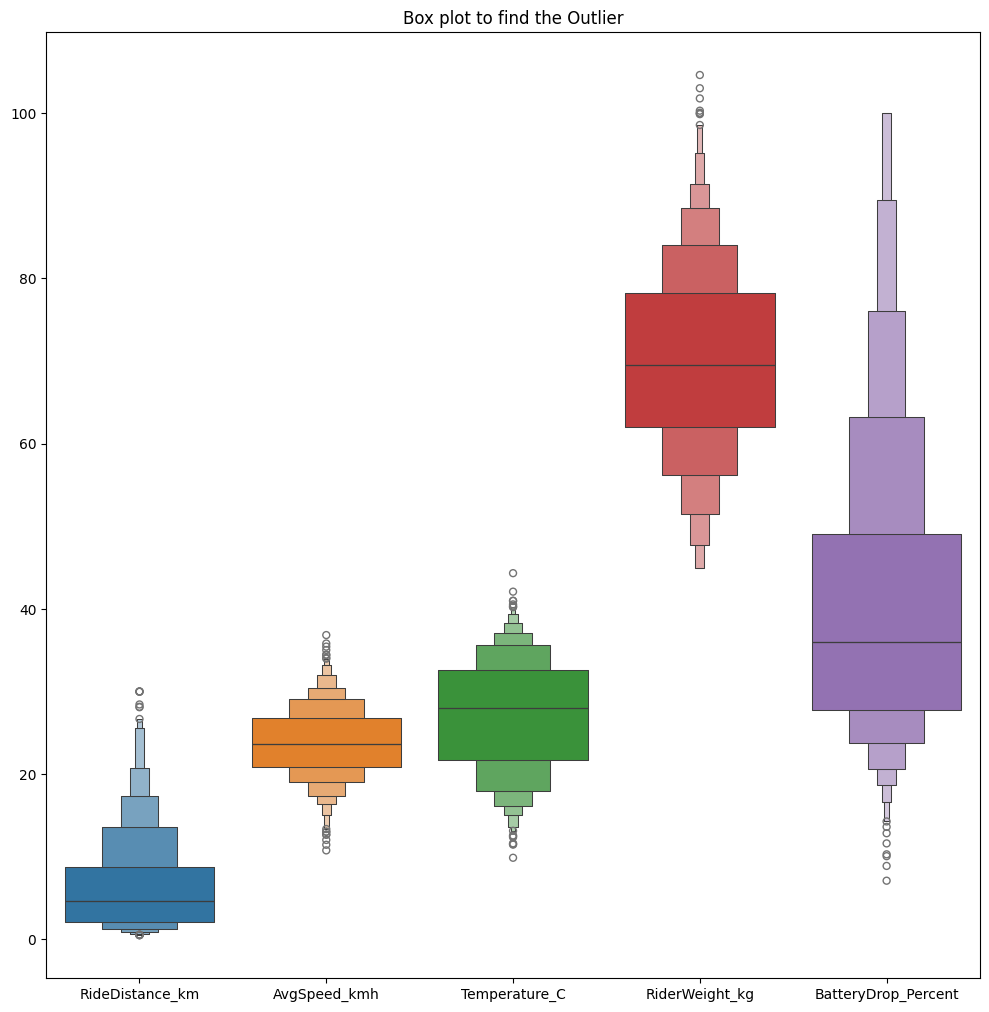

In [7]:
plt.figure(figsize=(10,10))
sns.boxenplot(df)
plt.tight_layout()
plt.title("Box plot to find the Outlier")
plt.show()

In [8]:
def upandlow(col:pd.Series):
    q1 = col.quantile(0.25)
    q3 = col.quantile(0.75)
    iqr = q3-q1
    up = q3+1.5*iqr
    low = q1-1.5*iqr
    return (up,low)

In [9]:
for col in df.columns:
    up,low = upandlow(df[col])
    df.drop(df.query(f" {col} < @low or {col} > @up ").index,axis=0,inplace=True)
    # df.drop(df[(df[col]>up) | (df[col]<low)].index,axis=0,inplace=True)
    df.reset_index(drop=True)
    print(col,upandlow(df[col]))

RideDistance_km (np.float64(16.695441), np.float64(-6.82663198))
AvgSpeed_kmh (np.float64(35.05764158750001), np.float64(12.264523867499994))
Temperature_C (np.float64(49.00466942250001), np.float64(5.375436762499994))
RiderWeight_kg (np.float64(102.67929481624998), np.float64(37.35189782625002))
BatteryDrop_Percent (np.float64(74.79247840125001), np.float64(-1.4991935687500053))


In [10]:
df.shape

(840, 5)

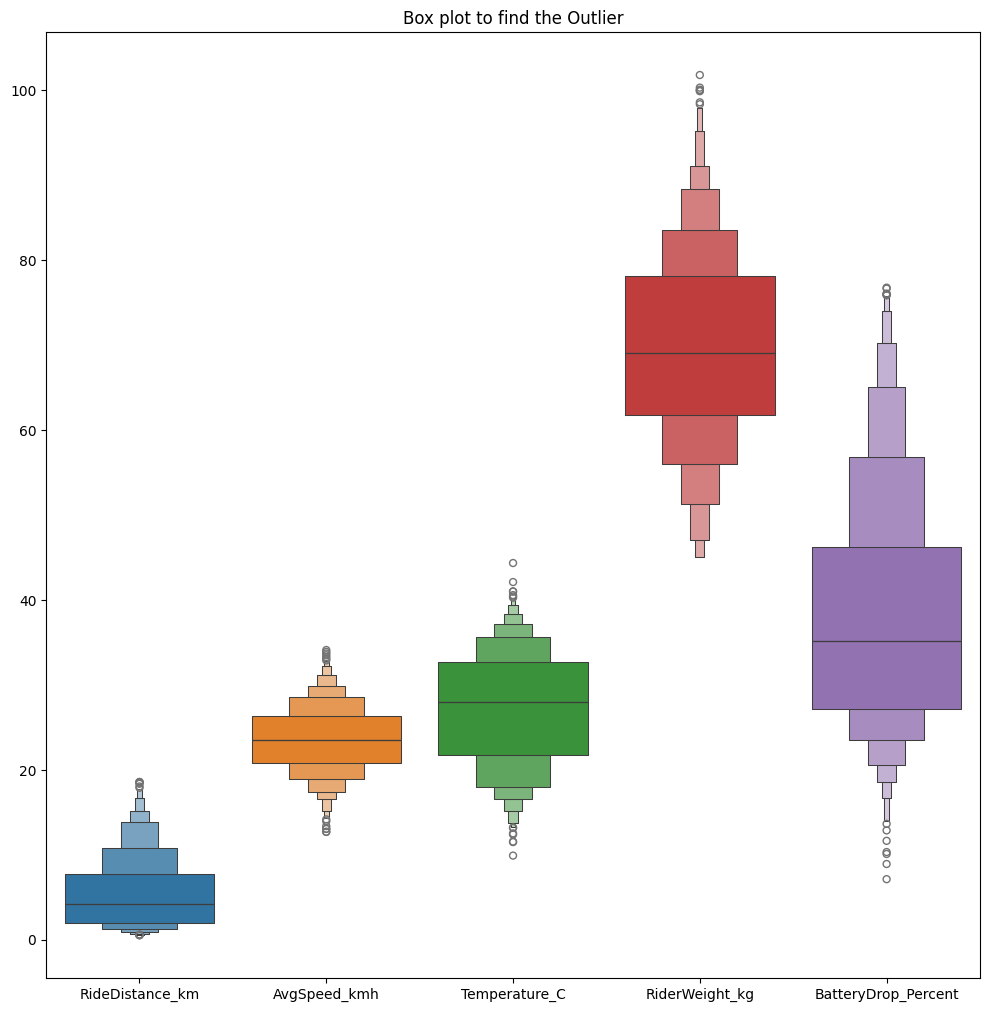

In [11]:
plt.figure(figsize=(10,10))
sns.boxenplot(df)
plt.tight_layout()
plt.title("Box plot to find the Outlier")
plt.show()

# skew 
<img src ="../../../skewness.svg" style="background-color:white;">


### log1p
### sqrt
### zscore

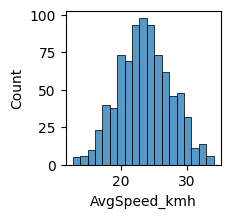

In [12]:
plt.figure(figsize=(2,2))
sns.histplot(df["AvgSpeed_kmh"])
plt.show()

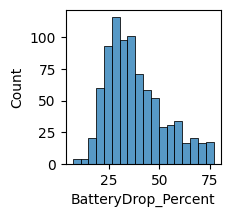

In [13]:
plt.figure(figsize=(2,2))
sns.histplot(df["BatteryDrop_Percent"])
plt.show()

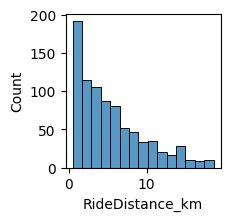

In [14]:
plt.figure(figsize=(2,2))
sns.histplot(df["RideDistance_km"])
plt.show()

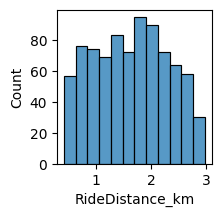

In [15]:
plt.figure(figsize=(2,2))
sns.histplot(np.log1p(df["RideDistance_km"]))
plt.show()


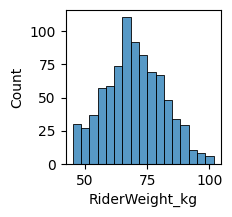

In [16]:
plt.figure(figsize=(2,2))
sns.histplot(df["RiderWeight_kg"])
plt.show()

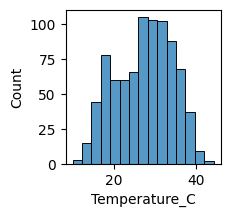

In [17]:
plt.figure(figsize=(2,2))
sns.histplot(df["Temperature_C"])
plt.show()

In [18]:
df.skew()

RideDistance_km        1.035043
AvgSpeed_kmh           0.030179
Temperature_C         -0.203413
RiderWeight_kg         0.077530
BatteryDrop_Percent    0.754840
dtype: float64

# Encoding

In [19]:
df.dtypes # no need

RideDistance_km        float64
AvgSpeed_kmh           float64
Temperature_C          float64
RiderWeight_kg         float64
BatteryDrop_Percent    float64
dtype: object

# Feature engineering


# scaling

In [20]:
sc = StandardScaler()
X = sc.fit_transform(df.drop("BatteryDrop_Percent",axis=1))

In [21]:
X

array([[-0.49218133,  0.12624158,  0.2455683 ,  1.8989261 ],
       [ 3.11371754, -0.49522505, -1.4988811 , -1.43146197],
       [ 0.71053214,  1.037599  ,  0.36741488, -0.15197642],
       ...,
       [ 2.05853344,  1.37210845,  0.15459959,  2.15642109],
       [-1.13957887, -2.72033384,  0.24044599, -0.61317625],
       [-1.03129638, -1.34506983, -0.90997895, -0.07506232]],
      shape=(840, 4))

In [22]:
Y = df["BatteryDrop_Percent"]

In [23]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,train_size=0.8,random_state=42)

In [24]:
lr = LinearRegression()
lr.fit(x_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [25]:
y_pred = lr.predict(x_test)

In [26]:
lr.score(x_test,y_test)

0.9326169222261973

In [27]:
np.mean((y_pred-y_test)**2)

np.float64(17.227057600587155)

In [28]:
RideDistance_km  = input("RideDistance_km")
AvgSpeed_kmh = input("AvgSpeed_kmh")
Temperature_C = input("Temperature_C")
RiderWeight_kg = input("RiderWeight_kg")

In [29]:
inp

NameError: name 'inp' is not defined

In [ ]:
inp = np.array([[RideDistance_km,AvgSpeed_kmh,Temperature_C,RiderWeight_kg]])
inp = sc.transform(inp)
lr.predict(inp)

/Users/hp/ProjectAndCode/DataScience/env/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([44.46650149])

In [ ]:
import pickle as pk

In [ ]:
model_to_save = {
    'feature_names' : ['RideDistance_km', 'AvgSpeed_kmh','Temperature_C','RiderWeight_kg'],
    "model" : lr
}

In [ ]:
with open("lr_model.pkl","wb") as file:
    pk.dump(lr,file)
with open("lr_model.pkl","rb") as file:
    new_lr = pk.load(file)

In [ ]:
new_lr.predict(inp)

array([44.46650149])